In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
from sklearn.ensemble import GradientBoostingRegressor


In [3]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()

dms=pd.get_dummies(df[['League', 'Division','NewLeague']])

y=df['Salary']
X_= df.drop(['Salary','League', 'Division','NewLeague'],axis=1).astype('float64')
X= pd.concat([X_, dms[['League_N', 'Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Model Tahmin

In [4]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [5]:
y_pred=gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.0827120726843

### Model Tuning

In [7]:
gbm_params={"learning_rate":[0.001,0.1,0.1],
"max_depth":[3,5,8],
"n_estimators": [100,200,500],
"subsample":[1,0.5,0.8],
"loss":["ls","lad","quantile"]}

In [8]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


c:\Users\sevva\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [9]:
gbm_cv_model.best_params_ 

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.5}

In [10]:
gbm_model_tuned=GradientBoostingRegressor(learning_rate=0.1,loss="ls",max_depth=3,n_estimators=200,subsample=0.5).fit(X_train,y_train)

c:\Users\sevva\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [11]:
y_pred=gbm_model_tuned.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

340.44370087005007

### Değişken önem düzeyi

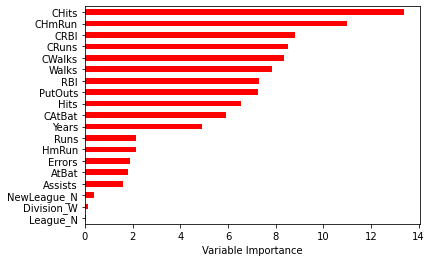

In [14]:
Importance=pd.DataFrame({"Importance": gbm_model_tuned.feature_importances_*100},
                        index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind="barh",color='r') 
plt.xlabel('Variable Importance')
plt.gca().legend_=None